In [1]:
import itertools
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dependence.tests import func_sum
from dependence.tests.test_functions import func_cum_sum_weight, func_spec
from dependence import ConservativeEstimate
from dependence import quantile_func
from dependence import iterative_vine_minimize
from dependence.dependence_plot import matrix_plot_input, matrix_plot_quantities
from dependence.dependence_plot import plot_iterative_results

%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = 12
np.random.seed(random_state)

In [67]:
dim = 3
margins = []
for i in range(dim):
    margins.append(ot.Uniform(0, 1.))
    
margins[0] = ot.Uniform(0, 1.)
alpha = 0.1
q_func = quantile_func(alpha)
families = np.tril(np.ones((dim, dim)), k=1)

In [76]:
n_influencial_pairs = 2
val_influencial = 1.
val_non_influencial = 0.0
corr_dim = int(dim * (dim-1)/2)

all_pairs = np.asarray(list(itertools.combinations(range(dim), 2)))
selected_pairs = all_pairs[np.random.choice(range(corr_dim), size=n_influencial_pairs, replace=False)]
selected_pairs = np.asarray([[0, dim-2], [1, dim-1]])
# selected_pairs = all_pairs

power = np.zeros((dim, dim))
for i in range(1, dim):
    for j in range(i):
        if [j, i] in selected_pairs.tolist():
            print([i, j])
            power[i, j] = val_influencial
        else:
            power[i, j] = val_non_influencial
test_func = lambda x: func_cum_sum_weight(x, power)
print(power)

[1, 0]
[2, 1]
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]


In [77]:
n = 30000
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
indep_result = quant_estimate.independence(n_input_sample=n, q_func=q_func, random_state=random_state)
print(indep_result.quantity)

-0.00305235288273


In [78]:
algorithm_parameters = {
    "n_input_sample": n,
    "n_dep_param_init": 20,
    "max_n_pairs": 1,
    "grid_type": 'lhs',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 0,
    "adapt_vine_structure": True,
    "with_bootstrap": False,
    "verbose": False,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)


Iteration 1: selected pair: (2, 0)
Total number of evaluations = 1800000. Minimum quantity at -0.00.

Max number of pairs reached


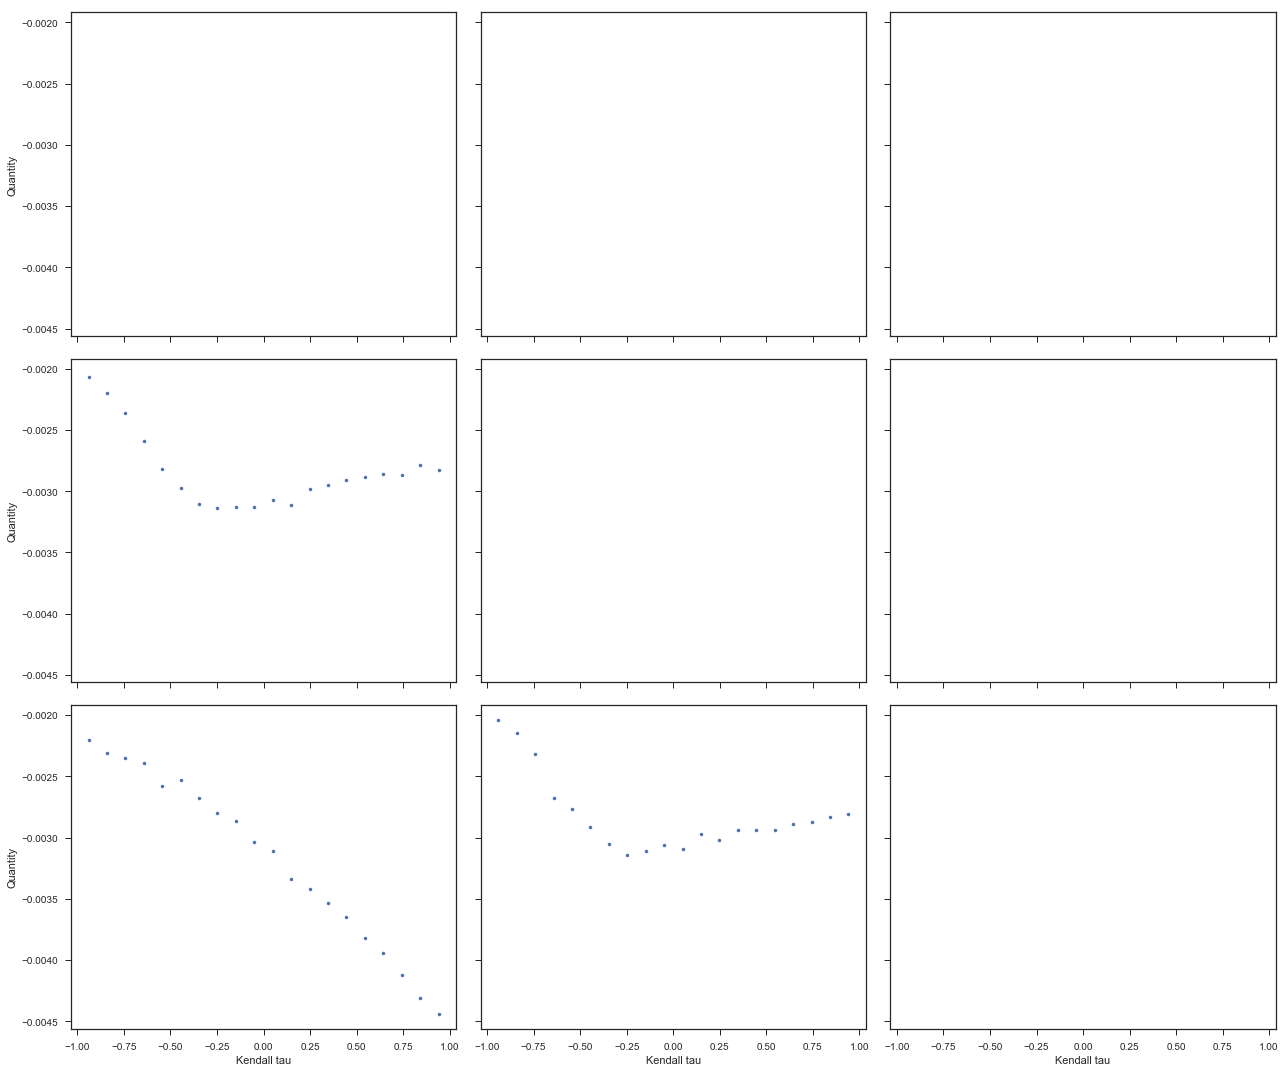

In [79]:
results = iterative_results[0]
matrix_plot_quantities(results, figsize=(18, 15))
# plt.savefig('output/matrix_plot.png')

In [ ]:
algorithm_parameters = {
    "n_input_sample": 1000,
    "n_dep_param_init": 10,
    "max_n_pairs": 5,
    "grid_type": 'lhs',
    "q_func": q_func,
    "delta": 0.1,
    "n_add_pairs": 2,
    "n_remove_pairs": 3,
    "adapt_vine_structure": True,
    "with_bootstrap": False,
    "verbose": True,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

In [28]:
K = 1000
grid_type = 'lhs'
grid_results_lhs = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=20000, grid_type=grid_type, q_func=q_func)
min_result = grid_results_lhs.min_result
min_result.quantity

-0.15242951754015796

In [27]:
min_result.quantity

-0.12834781984743904

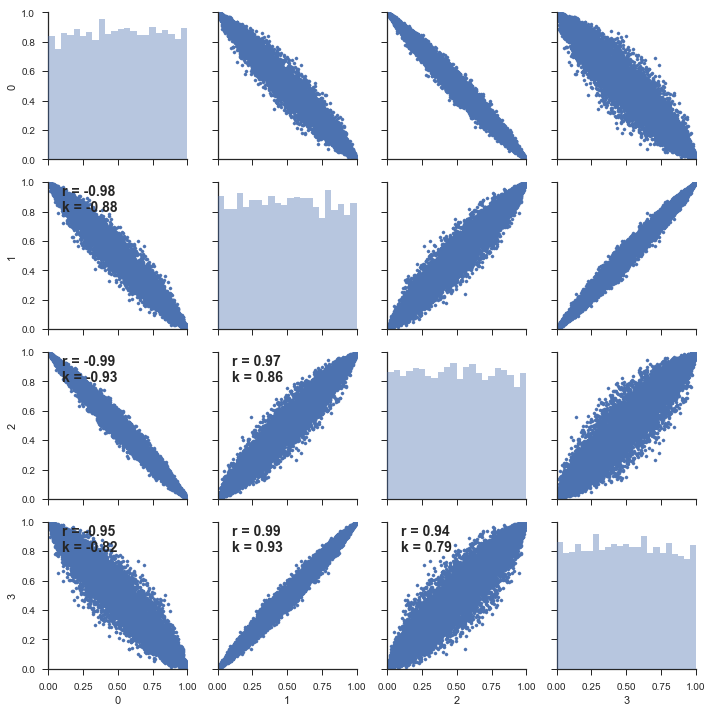

In [26]:
from dependence.dependence_plot import matrix_plot_input
matrix_plot_input(min_result, margins=margins)

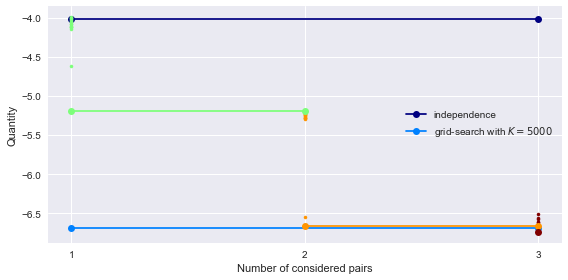

In [21]:
plot_iterative_results(iterative_results, indep_result=indep_result, grid_results=grid_results_lhs, q_func=q_func)
plt.savefig('./output/iterative_result_with_grid_%d.pdf' % (K))
plt.savefig('./output/iterative_result_with_grid_%d.png' % (K))

In [18]:
K = 200
grid_type = 'vertices'
grid_results_vertices = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)
min_result_vertices = grid_results_vertices.min_result
min_result_vertices.quantity

-6.717148183862132